# STA 220 Data & Web Technologies for Data Analysis

### Lecture 15, 25/2/25, Interactive Visualization: Cartography

### Announcements 

- 

### Last week's topics
- Cartography
    - Chloropeth maps

<div>
    <center>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/Carte_figurative_de_l%27instruction_populaire_de_la_France.jpg" width="300"/>
</center>
    </div>

<div>
    <center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e2/2019UKElectionMap.svg" width="300"/>
</center>
</div>

### Today's topics
- Cartography

While gradual color schemes are most appropriate for chloropeth maps, they only allow to show a single feature. 

Another problem in chloropeth maps is that they do not accurately depict data over geographic space with the use of large blocks. 

Dasyncretic maps address this issue. They use auxiliary information to portray the data more accurately. They intersect geographical objects to filter out spatial information that does not contribute to the data. E.g., for California, you may consider [this](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-land-ownership-1/explore?location=38.944934%2C-120.161746%2C10.45) map. 

<div>
    <center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Utah_Valley_dasymetric_map.png" width="1000"/>
</center>
</div>

Another popular map format are dot maps. Consider the following map from the 1931 Polish census. 

<div>
    <center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/GUS_languages1931_Poland.jpg" width="500" />
        </center>
</div>

Lets give this map a modern touch! We will draw from [Paul Dziemielas](https://dziemiela.com/personal/interwar_poland.html) geographical boundaries and census results. 

In [1]:
import requests
r = requests.get('https://www.dziemiela.com/personal/Interwar_Poland_1934_20142.json', headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
})
topoJSON = r.json() # this is in topoJSON format!

In [6]:
topoJSON['objects']['Palatinates']['geometries']

[{'type': 'Polygon',
  'properties': {'GEOID': 'W11',
   'PALATINATE_ID': 'W11',
   'PALATINATE_NAME': 'Wilno',
   'CAPITOL': 'M110100'},
  'id': 'W11',
  'arcs': [[-238,
    -239,
    -235,
    -231,
    -226,
    -227,
    -247,
    -248,
    253,
    -331,
    -332,
    -245,
    -242]]},
 {'type': 'Polygon',
  'properties': {'GEOID': 'W12',
   'PALATINATE_ID': 'W12',
   'PALATINATE_NAME': 'Nowogródek',
   'CAPITOL': 'M120500'},
  'id': 'W12',
  'arcs': [[-254,
    247,
    246,
    226,
    -250,
    -269,
    -265,
    204,
    208,
    216,
    215,
    -263,
    -259,
    -260]]},
 {'type': 'Polygon',
  'properties': {'GEOID': 'W08',
   'PALATINATE_ID': 'W08',
   'PALATINATE_NAME': 'Białystok',
   'CAPITOL': 'M080700'},
  'id': 'W08',
  'arcs': [[-115,
    -118,
    -333,
    330,
    259,
    258,
    262,
    219,
    -271,
    -138,
    -139,
    -140,
    -141,
    -142,
    -129,
    -130,
    -131,
    -132,
    -133,
    711,
    714,
    -751,
    -750,
    -124,
    -12

In [ ]:
topoJSON['objects']['Palatinates']['geometries']

In [12]:
import folium
m = folium.Map(width=600, height=400, tiles = None,
               location=[53, 23], zoom_start=5)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite'
).add_to(m)

In [13]:
topoJSON['objects'].keys()#['Districts']['geometries']#[0]['properties']['GEOID']

dict_keys(['Districts', 'Palatinates', 'Countries', 'Towns'])

In [14]:
folium.TopoJson(topoJSON,
    object_path='objects.Districts', 
    style_function=lambda feature: {
        "fillColor": None,
        "fillOpacity": 0.0,
        "color": "lightgray",
        "weight": 1,
        "dashArray": "1",
    }, overlay=True, control=False).add_to(m)

In [15]:
folium.LayerControl().add_to(m)
m

Lets retrieve the census data from the same source.

In [16]:
import requests, zipfile, io
 
r = requests.get('https://www.dziemiela.com/personal/Interwar_Poland_1934_20142.zip', 
                 headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
})
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("../data/polish_census")

`fiona` is a module to handle geopackages. We have data for the 1931 and 1921 census, and a school census of 1926. We are only interested in the 1931 census. 

In [20]:
import fiona
fiona.listlayers('../data/polish_census/Interwar_Poland_1934.gpkg')

['Census_1931_Palatinates',
 'Census_1931_Districts',
 'Census_1931_Towns',
 'Census_1921_Districts',
 'Census_1921_Palatinates',
 'Census_1921_Towns',
 'Census_School_1926_Palatinates',
 'Census_School_1926_Districts']

In [21]:
import geopandas
districts = geopandas.read_file("../data/polish_census/Interwar_Poland_1934.gpkg", 
                                layer='Census_1931_Districts') 
districts.head(3)

GEOID  DISTRICT_NAME PALATINATE  AREA_SQKM  URBAN_AREA_SQKM  \
0  P0000  Warsaw Miasto        W00     118.07           118.07   
1  P0101       Brodnica        W01     912.10            30.30   
2  P0102        Chełmno        W01     738.00            18.10   

   RURAL_AREA_SQKM  URBAN_CENTERS  RURAL_CENTERS  LOCALITIES  POPULATION  ...  \
0              0.0            1.0            0.0         1.0   1171898.0  ...   
1            881.8            2.0           12.0       270.0     56287.0  ...   
2            719.9            1.0           10.0       218.0     52765.0  ...   

   OTHER_LANGUAGE  URBAN_OTHER_LANGUAGE  RURAL_OTHER_LANGUAGE  \
0          2181.0                2181.0                   0.0   
1             3.0                   1.0                   2.0   
2             3.0                   0.0                   3.0   

   LANGUAGE_NOT_GIVEN  URBAN_LANGUAGE_NOT_GIVEN  RURAL_LANGUAGE_NOT_GIVEN  \
0              2047.0                    2047.0                       0.0   
1                75.0                      11.0                      64.0   
2                90.0                       4.0                      86.0   

   TUTEJSZY  URBAN_TUTEJSZY  RURAL_TUTEJSZY  geometry  
0       0.0             0.0             0.0      None  
1       0.0             0.0             0.0      None  
2       0.0             0.0             0.0      None  

[3 rows x 106 columns]

In [22]:
print('\n'.join(districts.columns))

GEOID
DISTRICT_NAME
PALATINATE
AREA_SQKM
URBAN_AREA_SQKM
RURAL_AREA_SQKM
URBAN_CENTERS
RURAL_CENTERS
LOCALITIES
POPULATION
MALE
FEMALE
URBAN
URBAN_MALE
URBAN_FEMALE
RURAL
RURAL_MALE
RURAL_FEMALE
LITERATE
URBAN_LITERATE
RURAL_LITERATE
READ_ONLY
URBAN_READ_ONLY
RURAL_READ_ONLY
ILLITERATE
URBAN_ILLITERATE
RURAL_ILLITERATE
LITERACY_UNKNOWN
URBAN_LITERACY_UNKNOWN
RURAL_LITERACY_UNKNOWN
CATHOLIC
URBAN_CATHOLIC
RURAL_CATHOLIC
ORTHODOX
URBAN_ORTHODOX
RURAL_ORTHODOX
GREEK_CATHOLIC
URBAN_GREEK_CATHOLIC
RURAL_GREEK_CATHOLIC
AUGSBERG_EVANGELICAL
URBAN_AUGSBERG_EVANGELICAL
RURAL_AUGSBERG_EVANGELICAL
REFORM_EVANGELICAL
URBAN_REFORM_EVANGELICAL
RURAL_REFORM_EVANGELICAL
UNION_EVANGELICAL
URBAN_UNION_EVANGELICAL
RURAL_UNION_EVANGELICAL
BEZ_EVANGELICAL
URBAN_BEZ_EVANGELICAL
RURAL_BEZ_EVANGELICAL
OTHER_CHRISTIAN
URBAN_OTHER_CHRISTIAN
RURAL_OTHER_CHRISTIAN
JEWISH
URBAN_JEWISH
RURAL_JEWISH
OTHER_NONCHRISTIAN
URBAN_OTHER_NONCHRISTIAN
RURAL_OTHER_NONCHRISTIAN
ATHEIST
URBAN_ATHEIST
RURAL_ATHEIST
RELIGION_NOT_

Lets craft the data set that is used to plot dots. 

In [ ]:
import numpy as np
import pandas as pd
data = districts[['GEOID', 'POLISH', 'UKRAINIAN', 'RUSKI', 
                    'BELARUSIAN', 'LITHUANIAN', 'GERMAN', 'YIDDISH', 'HEBREW']].set_index('GEOID').dropna()

In [24]:
data.head()

POLISH  UKRAINIAN  RUSKI  BELARUSIAN  LITHUANIAN  GERMAN   YIDDISH  \
GEOID                                                                         
P0000  826242.0     1188.0   94.0       578.0       117.0  1892.0  313611.0   
P0101   50990.0        6.0    2.0         3.0         2.0  5100.0      96.0   
P0102   44700.0        4.0    1.0         1.0         3.0  7930.0      23.0   
P0103   68999.0       18.0    5.0         3.0         8.0  7631.0       8.0   
P0104   39645.0        8.0    3.0         4.0         1.0  2862.0     108.0   

        HEBREW  
GEOID           
P0000  19743.0  
P0101      0.0  
P0102      0.0  
P0103      0.0  
P0104      9.0

In [25]:
data = data.apply(lambda x: np.floor(x / 10000).astype(int), axis = 1)

In [26]:
data.head()

POLISH  UKRAINIAN  RUSKI  BELARUSIAN  LITHUANIAN  GERMAN  YIDDISH  \
GEOID                                                                      
P0000      82          0      0           0           0       0       31   
P0101       5          0      0           0           0       0        0   
P0102       4          0      0           0           0       0        0   
P0103       6          0      0           0           0       0        0   
P0104       3          0      0           0           0       0        0   

       HEBREW  
GEOID          
P0000       1  
P0101       0  
P0102       0  
P0103       0  
P0104       0

As for the UK election, choose colors for each category. 

In [27]:
colorpicker = {lang: color for lang, color in zip(data.columns, 
    ['#de3e16', '#f7d914', '#1cbd87', '#36a334', '#b569e0', '#64a8ed', '#b9d676', '#f781b2'])}

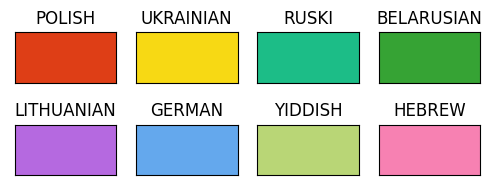

In [28]:
import matplotlib.pyplot as plt

y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=2, sharex=True, sharey=True,
                         figsize=(5,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, colorpicker.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=colorpicker[key])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(key))

plt.tight_layout()
plt.show()

Even though topoJSON is a more economical data format, we want to generate random points in each geometric object. To do so, we need to recast the topoJSON in to geoJSON format. 

In [29]:
from pytopojson import feature
feature_ = feature.Feature()
geojson = feature_(topoJSON, 'Districts')

In [32]:
geojson['features'][0] # navigate through... / do not print

{'id': 'P1613',
 'type': 'Feature',
 'properties': {'GEOID': 'P1613',
  'PALATINATE_ID': 'W16',
  'PALATINATE_NAME': 'Stanisławów',
  'DISTRICT_ID': 'P1613',
  'DISTRICT_NAME': 'Śniatyn',
  'CAPITOL': 'M161300',
  'COLOR_CODE': 1,
  'style': {'fillColor': None,
   'fillOpacity': 0.0,
   'color': 'lightgray',
   'weight': 1,
   'dashArray': '1'}},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[25.42765165081356, 48.583826826426645],
    [25.43855432006866, 48.581386052309675],
    [25.448621383285968, 48.5768970761365],
    [25.453807446155487, 48.57189604944927],
    [25.462601204934238, 48.56401047153289],
    [25.472402996393512, 48.56068214319156],
    [25.487165369727983, 48.55924840175222],
    [25.495547957281786, 48.560340776182194],
    [25.500389166865865, 48.57005266759869],
    [25.49473887841979, 48.5782966808749],
    [25.484459597796057, 48.58462903889866],
    [25.47488328733111, 48.591166217128034],
    [25.468742246132678, 48.597353494172815],
    [25.46750873245

In [35]:
gdf = geopandas.GeoDataFrame.from_features(geojson['features'])
gdf.head(3)

geometry  GEOID PALATINATE_ID  \
0  POLYGON ((25.42765 48.58383, 25.43855 48.58139...  P1613           W16   
1  POLYGON ((25.05030 48.70389, 25.05624 48.70371...  P1605           W16   
2  POLYGON ((25.46082 48.86457, 25.46990 48.85979...  P1603           W16   

  PALATINATE_NAME DISTRICT_ID DISTRICT_NAME  CAPITOL  COLOR_CODE  \
0     Stanisławów       P1613       Śniatyn  M161300           1   
1     Stanisławów       P1605      Kołomyja  M160500           2   
2     Stanisławów       P1603     Horodenka  M160300           6   

                                               style  
0  {'fillColor': None, 'fillOpacity': 0.0, 'color...  
1  {'fillColor': None, 'fillOpacity': 0.0, 'color...  
2  {'fillColor': None, 'fillOpacity': 0.0, 'color...

In [37]:
gdf['geometry'][0].bounds

(25.101513287901412, 48.35610089447791, 25.619801248743862, 48.615104578659896)

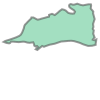

In [36]:
gdf['geometry'][0]

Random (on the cartesian plane) points are generated in each object. 

In [38]:
import shapely, random
def generate_random_points(number, GEOID):

    # Select list entry of given object
    polygon = gdf[gdf['GEOID'] == GEOID]['geometry']#[0]
    # Extract bounding box (extent) from the GeoDataFrame
    minx, miny, maxx, maxy = polygon.bounds.squeeze()
    
    # Generate random points within the bounding box
    random_points = []
    while len(random_points) < number:
        random_point = shapely.geometry.Point(
            random.uniform(minx, maxx), random.uniform(miny, maxy))
        # Check if the point is inside any of the polygons
        if all(random_point.intersects(polygon)):
            random_points.append(random_point)

    return geopandas.GeoDataFrame(geometry=random_points)['geometry']

In [39]:
generate_random_points(2, 'P1613')

0    POINT (25.49514 48.49937)
1    POINT (25.44539 48.46033)
Name: geometry, dtype: geometry

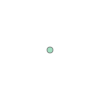

In [40]:
generate_random_points(1, 'P1613')[0]

Finally, lets add the dots to the map. 

In [41]:
m = folium.Map(width=600, height=400, tiles = None,
               location=[53, 23], zoom_start=5)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite'
).add_to(m)

folium.TopoJson(topoJSON,
    object_path='objects.Districts', 
    style_function=lambda feature: {
        "fillColor": None,
        "fillOpacity": 0.0,
        "color": "lightgray",
        "weight": 1,
        "dashArray": "1",
    }, overlay=True, control=False).add_to(m)

In [42]:
for lang, countsvector in dict(data).items():
    color = colorpicker[lang]
    fg = folium.FeatureGroup(name=lang).add_to(m)
    for GEOID, counts in dict(countsvector).items(): 
        for point in generate_random_points(counts, GEOID): 
            folium.CircleMarker(location=[point.y, point.x], 
                    stroke=False,
                    fill=True,
                    color=color, 
                    fill_opacity=1,
                    radius=2).add_to(fg)

In [43]:
folium.LayerControl(collapsed = False).add_to(m)
m 

<div>
    <center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/GUS_languages1931_Poland.jpg" width="500"/>
</center>
    </div>

So why did the Polish census agency decide for a dot map? Lets create a plurality map. 

In [44]:
district_colors = districts[['GEOID', 'POLISH', 'UKRAINIAN', 'RUSKI', 
                            'BELARUSIAN', 'LITHUANIAN', 'GERMAN', 'YIDDISH', 'HEBREW']].set_index('GEOID').dropna().idxmax(axis=1)
district_colors

GEOID
P0000       POLISH
P0101       POLISH
P0102       POLISH
P0103       POLISH
P0104       POLISH
           ...    
P1611    UKRAINIAN
P1612    UKRAINIAN
P1613        RUSKI
P1614       POLISH
P1616    UKRAINIAN
Length: 261, dtype: object

In [45]:
colorpicker

{'POLISH': '#de3e16',
 'UKRAINIAN': '#f7d914',
 'RUSKI': '#1cbd87',
 'BELARUSIAN': '#36a334',
 'LITHUANIAN': '#b569e0',
 'GERMAN': '#64a8ed',
 'YIDDISH': '#b9d676',
 'HEBREW': '#f781b2'}

In [48]:
topoJSON['objects']['Districts']

{'type': 'GeometryCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'geometries': [{'type': 'Polygon',
   'properties': {'GEOID': 'P1613',
    'PALATINATE_ID': 'W16',
    'PALATINATE_NAME': 'Stanisławów',
    'DISTRICT_ID': 'P1613',
    'DISTRICT_NAME': 'Śniatyn',
    'CAPITOL': 'M161300',
    'COLOR_CODE': 1,
    'style': {'fillColor': None,
     'fillOpacity': 0.0,
     'color': 'lightgray',
     'weight': 1,
     'dashArray': '1'}},
   'id': 'P1613',
   'arcs': [[-1, -2, -3, -4]]},
  {'type': 'Polygon',
   'properties': {'GEOID': 'P1605',
    'PALATINATE_ID': 'W16',
    'PALATINATE_NAME': 'Stanisławów',
    'DISTRICT_ID': 'P1605',
    'DISTRICT_NAME': 'Kołomyja',
    'CAPITOL': 'M160500',
    'COLOR_CODE': 2,
    'style': {'fillColor': None,
     'fillOpacity': 0.0,
     'color': 'lightgray',
     'weight': 1,
     'dashArray': '1'}},
   'id': 'P1605',
   'arcs': [[-5, 3, -6, -7, -8]]},
  {'type': 'Polygon',
   'properties': {'GEOID':

In [49]:
district_colors

GEOID
P0000       POLISH
P0101       POLISH
P0102       POLISH
P0103       POLISH
P0104       POLISH
           ...    
P1611    UKRAINIAN
P1612    UKRAINIAN
P1613        RUSKI
P1614       POLISH
P1616    UKRAINIAN
Length: 261, dtype: object

Lets add the palatinates as well. 

In [46]:
palatinates = geopandas.read_file("../data/polish_census/Interwar_Poland_1934.gpkg", layer='Census_1931_Palatinates')
palatinate_colors = palatinates[['GEOID', 'POLISH', 'UKRAINIAN', 'RUSKI', 
                                 'BELARUSIAN', 'LITHUANIAN', 'GERMAN', 'YIDDISH', 'HEBREW']].set_index('GEOID').dropna().idxmax(axis=1) 

In [50]:
m = folium.Map(width=600, height=400, tiles = None,
               location=[53, 23], zoom_start=5)
base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite'
).add_to(base_map)
base_map.add_to(m)

folium.TopoJson(topoJSON,
    name = "Districts",
    object_path='objects.Districts', 
    style_function=lambda feature: {
        "fillColor": colorpicker[district_colors[feature['properties']['GEOID']]],
        "fillOpacity": 0.8,
        "color": "lightgray",
        "weight": 1,
        "dashArray": "1",
    }, overlay=False).add_to(m)

folium.TopoJson(topoJSON,
    name = 'Palatinates',
    object_path='objects.Palatinates', 
    style_function=lambda feature: {
        "fillColor": colorpicker[palatinate_colors[feature['properties']['GEOID']]],
        "fillOpacity": 0.8,
        "color": "lightgray",
        "weight": 1, 
        "dashArray": "1",
    }, overlay=False).add_to(m)

In [51]:
folium.LayerControl(collapsed = False).add_to(m)
m

The actual map from the census did only consider the categories 'Polish' or 'Other'. 

In [52]:
district_colors = districts[['GEOID', 'POLISH', 'UKRAINIAN', 'RUSKI', 
                            'BELARUSIAN', 'LITHUANIAN', 'GERMAN', 'YIDDISH', 'HEBREW']].set_index('GEOID').dropna()

district_colors = pd.DataFrame({"POLISH": district_colors['POLISH'], 
                                "OTHER": district_colors.drop('POLISH', axis=1).sum(axis=1)}).idxmax(axis=1)

In [53]:
palatinates = geopandas.read_file("../data/polish_census/Interwar_Poland_1934.gpkg", layer='Census_1931_Palatinates')
palatinate_colors = palatinates[['GEOID', 'POLISH', 'UKRAINIAN', 'RUSKI', 
                                 'BELARUSIAN', 'LITHUANIAN', 'GERMAN', 'YIDDISH', 'HEBREW']].set_index('GEOID').dropna()

palatinate_colors = pd.DataFrame({"POLISH": palatinate_colors['POLISH'], 
                                  "OTHER": palatinate_colors.drop('POLISH', axis=1).sum(axis=1)}).idxmax(axis=1)

In [54]:
colorpicker["OTHER"] = '#b9d676'

In [55]:
m = folium.Map(width=600, height=400, tiles = None,
               location=[53, 23], zoom_start=5)
base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Terrain_Base/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite'
).add_to(base_map)
base_map.add_to(m)

folium.TopoJson(topoJSON,
    name = "Districts",
    object_path='objects.Districts', 
    style_function=lambda feature: {
        "fillColor": colorpicker[district_colors[feature['properties']['GEOID']]],
        "fillOpacity": 0.8,
        "color": "lightgray",
        "weight": 1,
        "dashArray": "1",
    }, overlay=False).add_to(m)

folium.TopoJson(topoJSON,
    name = 'Palatinates',
    object_path='objects.Palatinates', 
    style_function=lambda feature: {
        "fillColor": colorpicker[palatinate_colors[feature['properties']['GEOID']]],
        "fillOpacity": 0.8,
        "color": "lightgray",
        "weight": 1,
        "dashArray": "1",
    }, overlay=False).add_to(m)

In [56]:
folium.LayerControl(collapsed = False).add_to(m)
m 